In [5]:
import os
import keras
os.environ['KERAS_BACKEND']='tensorflow'

In [6]:
#importing libraries
import math
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'E:\DATA_TA\Data\AALI.JK.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,23154.279297,23821.275391,23106.636719,23416.314453,20657.943359,1385945
1,2015-01-05,23440.134766,23535.419922,23201.921875,23511.599609,20742.003906,619089
2,2015-01-06,23416.314453,23416.314453,23035.173828,23154.279297,20426.775391,1142676
3,2015-01-07,23154.279297,23535.419922,23154.279297,23535.419922,20763.019531,1882560
4,2015-01-08,23678.347656,24178.595703,23678.347656,24035.667969,21204.339844,1504852


The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable and drop the other columns.

In [4]:
data.drop(['Adj Close','Open','Low','High','Volume'],axis=1,inplace=True)

In [5]:
data.head()

,Date,Close
0,2015-01-02,23416.314453
1,2015-01-05,23511.599609
2,2015-01-06,23154.279297
3,2015-01-07,23535.419922
4,2015-01-08,24035.667969


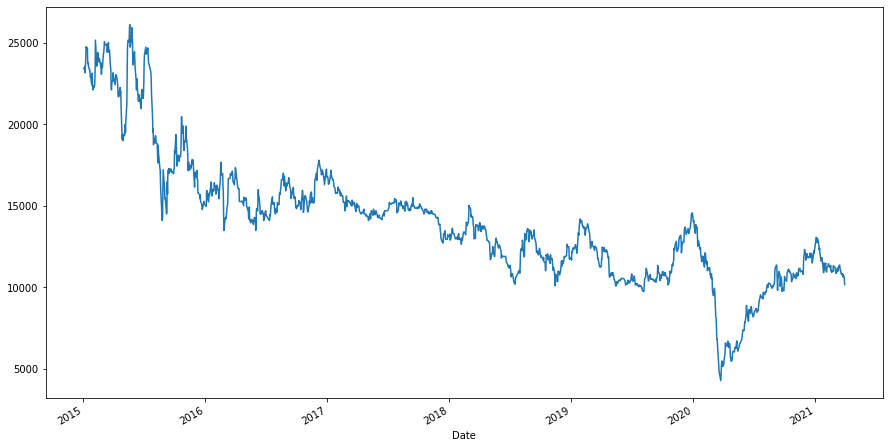

In [6]:
df = pd.read_csv(r'E:\DATA_TA\Data\AALI.JK.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df1=df['Close']
fig,ax = plt.subplots(figsize=(15,8))
df1.plot()

Now, the dtype of date is object. We'll convert that into date-time and will make it as the index for our dataframe.

In [7]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


In [8]:
data.index=data.Date

In [9]:
data.drop('Date', axis=1,inplace=True)

In [10]:
data.head()

,Close
Date,
2015-01-02,23416.314453
2015-01-05,23511.599609
2015-01-06,23154.279297
2015-01-07,23535.419922
2015-01-08,24035.667969


In [11]:
data.tail(314)

,Close
Date,
2019-12-11,13325.0
2019-12-12,13250.0
2019-12-13,13425.0
2019-12-16,13400.0
2019-12-17,13600.0
...,...
2021-03-24,10650.0
2021-03-25,10650.0
2021-03-26,10775.0


In [12]:
dataset=data.values

In [220]:
#scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [221]:
#we'll use 80% of the data as training data 
train = int(len(dataset) * 0.80)
test = len(dataset) - train 

In [222]:
print(train, test)

1252 314


In [223]:
train= dataset[:train]
test = dataset[len(train):]

In [224]:
train.shape

(1252, 1)

In [225]:
test.shape

(314, 1)

In [226]:
#I'll use past two days data to predict the price for next day. I tried a few numbers and this was giving least error. Therefore, I thought of using this.
x_train, y_train = [], []
for i in range(len(train)-2):
    x_train.append(dataset[i:i+2,0])
    y_train.append(dataset[i+2,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [227]:
x_train.shape

(1250, 2)

In [228]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1250, 2, 1)

In [229]:
x_train.shape

(1250, 2, 1)

In [230]:
x_test = []
y_test=[]
for i in range(len(test)-2):
    x_test.append(dataset[len(train)-2+i:len(train)+i,0])
    y_test.append(dataset[len(train)+i,0])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [231]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(312, 2, 1)

In [232]:
len(x_train)

1250

I will use LSTM to predict the stock price because LSTM stores the past information in predicting the future.

#I've used a LSTM model to predict the stock price. i checked for various other models but this was giving the least error. Therefore, I've used that
from keras.callbacks import EarlyStopping
fa = 'tanh'
epoch = 100
bs = 256
model= Sequential([
                   LSTM(265, input_shape=(x_train.shape[1],1), return_sequences=True),
                   LSTM(265),
                   Dense(16, activation=fa),
                   Dense(1)
])
print(model.summary())
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

In [233]:
#I've used a LSTM model to predict the stock price. i checked for various other models but this was giving the least error. Therefore, I've used that
from keras.callbacks import EarlyStopping
fa = 'tanh'
epoch = 100
bs = 256
lrt = 0.0005
model= Sequential([
                   LSTM(265, input_shape=(x_train.shape[1],1), return_sequences=True),
                   LSTM(265),
                   Dense(16),
                   Dense(1)
])
print(model.summary())
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 2, 265)            283020    
_________________________________________________________________
lstm_16 (LSTM)               (None, 265)               562860    
_________________________________________________________________
dense_15 (Dense)             (None, 16)                4256      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 850,153
Trainable params: 850,153
Non-trainable params: 0
_________________________________________________________________
None


model.compile(loss='mean_squared_error', optimizer=Adam(lr = lrt) , metrics = ['mean_squared_error','accuracy'])

In [234]:
model.compile(loss='mean_squared_error', optimizer='adam' , metrics = ['mean_squared_error','accuracy'])

In [235]:
history = model.fit(x_train, y_train, epochs=epoch , batch_size = bs, validation_data=(x_test, y_test),verbose=1, shuffle=False)

Train on 1250 samples, validate on 312 samples
Epoch 1/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.2227 - mean_squared_error: 0.2227 - accuracy: 0.0000e+00 - val_loss: 0.0201 - val_mean_squared_error: 0.0201 - val_accuracy: 0.0032
Epoch 2/100
1250/1250 [==============================] - 0s 350us/step - loss: 0.0702 - mean_squared_error: 0.0702 - accuracy: 0.0000e+00 - val_loss: 0.0204 - val_mean_squared_error: 0.0204 - val_accuracy: 0.0032
Epoch 3/100
1250/1250 [==============================] - 0s 397us/step - loss: 0.0304 - mean_squared_error: 0.0304 - accuracy: 8.0000e-04 - val_loss: 0.0508 - val_mean_squared_error: 0.0508 - val_accuracy: 0.0032
Epoch 4/100
1250/1250 [==============================] - 1s 435us/step - loss: 0.0104 - mean_squared_error: 0.0104 - accuracy: 8.0000e-04 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_accuracy: 0.0032
Epoch 5/100
1250/1250 [==============================] - 1s 457us/step - loss: 0.0083 - mean_squared_er

Epoch 73/100
1250/1250 [==============================] - 1s 473us/step - loss: 4.1360e-04 - mean_squared_error: 4.1360e-04 - accuracy: 8.0000e-04 - val_loss: 3.5468e-04 - val_mean_squared_error: 3.5468e-04 - val_accuracy: 0.0032
Epoch 74/100
1250/1250 [==============================] - 1s 453us/step - loss: 4.1348e-04 - mean_squared_error: 4.1348e-04 - accuracy: 8.0000e-04 - val_loss: 3.5403e-04 - val_mean_squared_error: 3.5403e-04 - val_accuracy: 0.0032
Epoch 75/100
1250/1250 [==============================] - 1s 447us/step - loss: 4.1335e-04 - mean_squared_error: 4.1335e-04 - accuracy: 8.0000e-04 - val_loss: 3.5332e-04 - val_mean_squared_error: 3.5332e-04 - val_accuracy: 0.0032
Epoch 76/100
1250/1250 [==============================] - 1s 527us/step - loss: 4.1323e-04 - mean_squared_error: 4.1323e-04 - accuracy: 8.0000e-04 - val_loss: 3.5267e-04 - val_mean_squared_error: 3.5267e-04 - val_accuracy: 0.0032
Epoch 77/100
1250/1250 [==============================] - 1s 450us/step - loss: 

In [236]:
#using the model for x_test and then converting the data to normal price using inverse transform
predicted_price= model.predict(x_test)
pred = predicted_price[:, 0]
from sklearn.metrics import mean_squared_error, r2_score
#accuracy_score = model.score(y_test, test_label)
print("R2 score : %f" % r2_score(y_test,pred))

R2 score : 0.967842


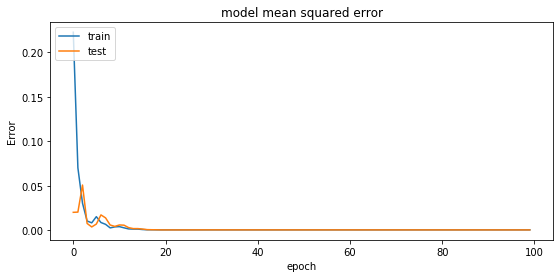

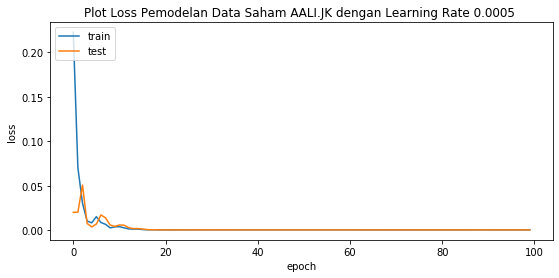

In [237]:
#summarize history for error
fig, ax = plt.subplots(figsize=(9,4))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
fig, ax = plt.subplots(figsize=(9,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss Pemodelan Data Saham AALI.JK dengan Learning Rate {} '.format(lrt))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [238]:
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

array([[13617.631 ],
       [13431.464 ],
       [13294.093 ],
       [13302.474 ],
       [13407.372 ],
       [13456.195 ],
       [13569.221 ],
       [13455.65  ],
       [13367.2295],
       [13536.986 ],
       [13748.184 ],
       [14202.68  ],
       [14486.977 ],
       [14355.89  ],
       [14023.487 ],
       [13876.531 ],
       [13455.83  ],
       [13366.868 ],
       [13488.979 ],
       [13771.632 ],
       [13666.519 ],
       [13520.104 ],
       [12978.462 ],
       [12592.492 ],
       [12753.629 ],
       [12793.415 ],
       [12535.745 ],
       [12399.331 ],
       [12447.504 ],
       [12334.612 ],
       [11949.2   ],
       [11701.469 ],
       [11845.437 ],
       [11885.614 ],
       [11949.589 ],
       [11764.938 ],
       [11413.234 ],
       [11485.717 ],
       [11933.917 ],
       [12134.076 ],
       [11893.01  ],
       [11557.371 ],
       [11645.23  ],
       [11452.894 ],
       [11126.002 ],
       [11205.803 ],
       [11237.58  ],
       [11205

In [239]:
len(predicted_price)

312

In [240]:
predicted_price =np.array(predicted_price)
predicted_price.shape

(312, 1)

In [241]:
y_test.shape

(312,)

In [242]:
y_test

array([0.41410539, 0.41066788, 0.41868874, 0.4175429 , 0.4267096 ,
       0.42441792, 0.41295956, 0.42327209, 0.4267096 , 0.44962633,
       0.46795972, 0.47139723, 0.44618882, 0.44962633, 0.42212625,
       0.4175429 , 0.41410539, 0.43816796, 0.43014711, 0.43129294,
       0.40837621, 0.37743862, 0.38431364, 0.39348033, 0.38087613,
       0.36941776, 0.37285527, 0.37285527, 0.35681356, 0.33389682,
       0.34420935, 0.34420935, 0.34993854, 0.34764686, 0.32587597,
       0.31900094, 0.34306352, 0.35910523, 0.35566772, 0.32816764,
       0.33504266, 0.33389682, 0.30868841, 0.31212592, 0.31670927,
       0.31212592, 0.31670927, 0.3144176 , 0.29952172, 0.28806335,
       0.30066756, 0.28577168, 0.28806335, 0.25254241, 0.23879237,
       0.24795907, 0.25025074, 0.25941744, 0.24795907, 0.17920886,
       0.17462552, 0.15170878, 0.11733368, 0.11733368, 0.07608356,
       0.05775017, 0.04056262, 0.02429174, 0.02016673, 0.00504168,
       0.        , 0.04170846, 0.0554585 , 0.03941678, 0.05087

In [243]:
#checking the score for our data
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.5f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.5f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, x_train, y_train , x_test, y_test)

Train Score: 0.00041 MSE (0.02019 RMSE)
Test Score: 0.00034 MSE (0.01835 RMSE)


(0.0004076194938737899, 0.0003368142200857759)

In [244]:
predicted_price = predicted_price[:, 0]
predicted_price

array([13617.631 , 13431.464 , 13294.093 , 13302.474 , 13407.372 ,
       13456.195 , 13569.221 , 13455.65  , 13367.2295, 13536.986 ,
       13748.184 , 14202.68  , 14486.977 , 14355.89  , 14023.487 ,
       13876.531 , 13455.83  , 13366.868 , 13488.979 , 13771.632 ,
       13666.519 , 13520.104 , 12978.462 , 12592.492 , 12753.629 ,
       12793.415 , 12535.745 , 12399.331 , 12447.504 , 12334.612 ,
       11949.2   , 11701.469 , 11845.437 , 11885.614 , 11949.589 ,
       11764.938 , 11413.234 , 11485.717 , 11933.917 , 12134.076 ,
       11893.01  , 11557.371 , 11645.23  , 11452.894 , 11126.002 ,
       11205.803 , 11237.58  , 11205.803 , 11253.581 , 11117.746 ,
       10830.952 , 10759.658 , 10830.905 , 10640.194 , 10425.23  ,
        9839.048 ,  9712.749 ,  9855.015 ,  9950.045 ,  9997.34  ,
        9364.982 ,  8390.731 ,  8171.553 ,  7625.14  ,  7158.2217,
        6879.1606,  6198.469 ,  5836.3433,  5496.6475,  5251.0537,
        5095.005 ,  4859.304 ,  5069.6714,  5720.5933,  5797.8

Since the MSE and RMSE is quite less for both: the training as well as the test data, our model does a great job.

In [245]:
predicted_price[:10]

array([13617.631 , 13431.464 , 13294.093 , 13302.474 , 13407.372 ,
       13456.195 , 13569.221 , 13455.65  , 13367.2295, 13536.986 ],
      dtype=float32)

In [246]:
y_test = y_test.reshape(y_test.shape[0] , 1)
y_test = scaler.inverse_transform(y_test)
y_test[:10]

array([[13325.],
       [13250.],
       [13425.],
       [13400.],
       [13600.],
       [13550.],
       [13300.],
       [13525.],
       [13600.],
       [14100.]])

In [247]:
#comparing the first 10 values of prediction for our data
diff = predicted_price-y_test
diff[:10]

array([[  292.63085937,   106.46386719,   -30.90722656, ...,
        -2422.18945313, -2454.20800781, -2581.43457031],
       [  367.63085938,   181.46386719,    44.09277344, ...,
        -2347.18945312, -2379.20800781, -2506.43457031],
       [  192.63085938,     6.46386719,  -130.90722656, ...,
        -2522.18945312, -2554.20800781, -2681.43457031],
       ...,
       [   92.63085938,   -93.53613281,  -230.90722656, ...,
        -2622.18945312, -2654.20800781, -2781.43457031],
       [   17.63085938,  -168.53613281,  -305.90722656, ...,
        -2697.18945312, -2729.20800781, -2856.43457031],
       [ -482.36914062,  -668.53613281,  -805.90722656, ...,
        -3197.18945312, -3229.20800781, -3356.43457031]])

In [248]:
import pandas_datareader as web
#Get the stock quote
deka = pd.read_csv(r'C:\Users\DELL\KODINGAN TA\DATA BARU TA 2\test_plot\AALI.test.csv')
deka = deka.dropna()
deka

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,13450.0,13500.0,13275.0,13325.0,13195.001953,626400
1,2019-12-12,13300.0,13475.0,13125.0,13250.0,13120.733398,865100
2,2019-12-13,13250.0,13625.0,13250.0,13425.0,13294.026367,441900
3,2019-12-16,13425.0,13500.0,13175.0,13400.0,13269.270508,782400
4,2019-12-17,13400.0,13675.0,13400.0,13600.0,13467.319336,873700
...,...,...,...,...,...,...,...
309,2021-03-24,10900.0,10900.0,10600.0,10650.0,10650.000000,1461500
310,2021-03-25,10650.0,10700.0,10575.0,10650.0,10650.000000,699700
311,2021-03-26,10625.0,10850.0,10500.0,10775.0,10775.000000,809900
312,2021-03-29,10775.0,10875.0,10600.0,10600.0,10600.000000,539300


In [43]:
df_pred = pd.DataFrame(predicted_price, columns = ['Harga'])
df_pred

,Harga
0,13610.420898
1,13427.560547
2,13289.308594
3,13286.868164
4,13397.672852
...,...
307,11134.134766
308,10990.277344
309,10970.915039
310,10950.537109


In [44]:
result = pd.concat([deka, df_pred], axis=1)
result.to_csv (r'C:\Users\DELL\KODINGAN TA\DATA BARU TA 2\test_plot\AALI{}.csv'.format(fa), index = False, header=True)

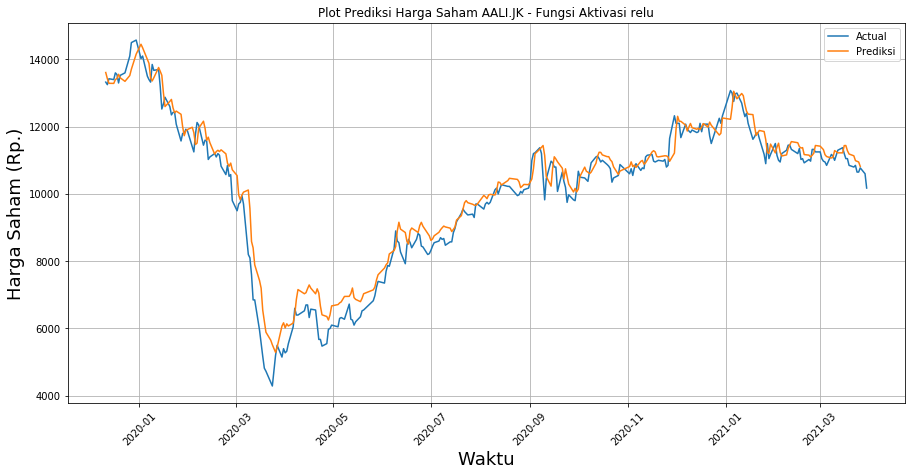

In [45]:
result = pd.read_csv(r'C:\Users\DELL\KODINGAN TA\DATA BARU TA 2\test_plot\AALI{}.csv'.format(fa),index_col='Date',parse_dates=True,infer_datetime_format=True)
plt.figure(figsize=(15,7))
plt.title('Plot Prediksi Harga Saham AALI.JK - Fungsi Aktivasi {}'.format(fa))
#We give the plot the data (the closing price of our stock)
plt.plot(result['Close'])
plt.plot(result['Harga'])
#We label the axis
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('Harga Saham (Rp.)', fontsize=18)
plt.xticks( rotation =45)
#We show the plot
plt.legend(['Actual','Prediksi'], loc='upper right')
plt.grid(True)
plt.show()

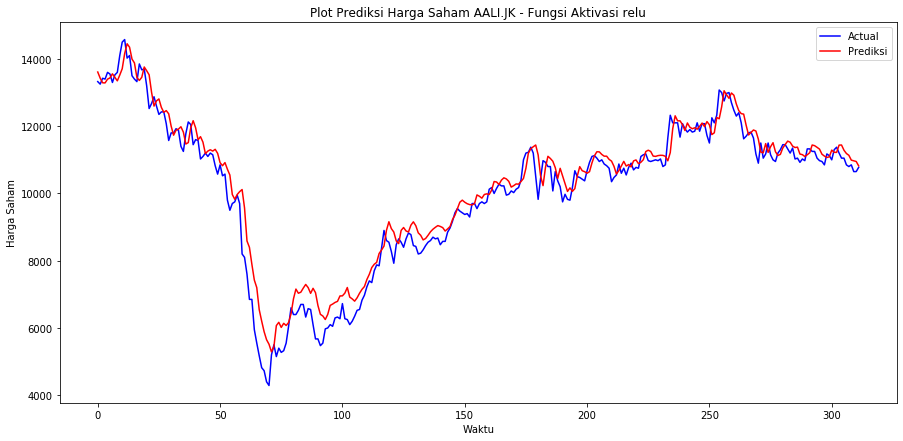

In [46]:
#plotting the courves for the actual test values and the predicted values. 
#plotting the courves for the actual test values and the predicted values. 

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(y_test , 'b')
plt.plot(predicted_price , 'r')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.title('Plot Prediksi Harga Saham AALI.JK - Fungsi Aktivasi {}'.format(fa))
plt.legend(['Actual','Prediksi'], loc='upper right')
plt.grid(False)
plt.show()